# By RezaUbaidillah
[Github](https://github.com/rezaubaidillah/Machine-Learning-Terapan/tree/main/Proyek%20Sistem%20Rekomendasi)

Terdapat 3 File CSV
- events1.csv
- items.csv
- users.csv

## Data Gathering

Mendownload data

In [1]:
!kaggle datasets download mexwell/google-merchandise-sales-data

Dataset URL: https://www.kaggle.com/datasets/mexwell/google-merchandise-sales-data
License(s): other
100% 4.59M/4.59M [00:00<00:00, 47.6MB/s]
100% 4.59M/4.59M [00:00<00:00, 47.2MB/s]


Unziping data

In [2]:
!unzip google-merchandise-sales-data.zip

Archive:  google-merchandise-sales-data.zip
  inflating: events1.csv             
  inflating: items.csv               
  inflating: users.csv               


## Data Understanding

### Import Liblaries yang Diperlukan

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
transaksi = pd.read_csv('/content/events1.csv')
barang = pd.read_csv('/content/items.csv')
profil = pd.read_csv('/content/users.csv')

print('Jumlah data event yang diterima: ', len(transaksi))
print('Jumlah data barang: ', len(barang.id.unique()))
print('Jumlah data profil: ', len(profil.id.unique()))

Jumlah data event yang diterima:  758884
Jumlah data barang:  1381
Jumlah data profil:  270154


### Univariate Exploratory Data Analysis

##### dataframe transaksi

In [ ]:
transaksi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758884 entries, 0 to 758883
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        758884 non-null  int64 
 1   ga_session_id  758884 non-null  int64 
 2   country        754329 non-null  object
 3   device         758884 non-null  object
 4   type           758884 non-null  object
 5   item_id        758884 non-null  int64 
 6   date           758884 non-null  object
dtypes: int64(3), object(4)
memory usage: 40.5+ MB


In [ ]:
transaksi.head()

,user_id,ga_session_id,country,device,type,item_id,date
0,2133,16909,US,mobile,purchase,94,2020-11-01 00:27:14
1,2133,16909,US,mobile,purchase,425,2020-11-01 00:27:14
2,5789,16908,SE,desktop,purchase,1,2020-11-01 01:44:44
3,5789,16908,SE,desktop,purchase,62,2020-11-01 01:44:44
4,5808,4267,US,mobile,add_to_cart,842,2020-11-01 03:06:29


Kita akan mengambil user_id, item_id dan country saja sisanya kita hapus

In [ ]:
print('Banyak data: ', len(transaksi))
print('Jumlah user_id: ', len(transaksi.user_id.unique()))
print('Jenis ga_session_id : ', transaksi.ga_session_id.unique())
print('Jenis country : ', transaksi.country.unique())
print('Jenis device: ', transaksi.device.unique())
print('jenis item_id: ', len(transaksi.item_id.unique()))
print('jenis date: ', len(transaksi.date.unique()))




Banyak data:  758884
Jumlah user_id:  14701
Jenis ga_session_id :  [16909 16908  4267 ...  9347  5568 12443]
Jenis country :  ['US' 'SE' 'CA' 'BE' 'GB' 'TR' 'PE' 'ES' 'IN' 'MY' 'IT' 'BD' 'BR' 'LB'
 'CN' 'PT' 'VN' 'JP' nan 'EC' 'RU' 'DE' 'HK' 'AU' 'MA' 'FR' 'GR' 'SA' 'AT'
 'CO' 'SG' 'IE' 'PK' 'IL' 'GT' 'NG' 'KR' 'MT' 'CZ' 'NL' 'AR' 'CH' 'TW'
 'MX' 'HU' 'PL' 'BH' 'FI' 'ID' 'SI' 'EG' 'UA' 'LV' 'PH' 'AE' 'DK' 'GE'
 'TH' 'PR' 'CL' 'MK' 'KE' 'SK' 'NZ' 'IQ' 'ZA' 'DO' 'UY' 'VE' 'AL' 'CR'
 'LK' 'TN' 'RS' 'SV' 'IS' 'RO' 'DZ' 'MO' 'BG' 'HR' 'KW' 'NO' 'KZ' 'KH'
 'EE' 'PS' 'AZ' 'MN' 'JO' 'BO' 'QA' 'JM' 'CY' 'LT' 'BS' 'LU' 'NP' 'HN'
 'GH' 'OM' 'BY' 'BA' 'PY' 'PA' 'XK' 'TT' 'MM' 'AM']
Jenis device:  ['mobile' 'desktop' 'tablet']
jenis item_id:  1381
jenis date:  78040


##### dataframe barang

In [ ]:
barang.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1381 entries, 0 to 1380
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1381 non-null   int64 
 1   name          1381 non-null   object
 2   brand         1381 non-null   object
 3   variant       973 non-null    object
 4   category      1381 non-null   object
 5   price_in_usd  1381 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 64.9+ KB


In [ ]:
barang.head()

,id,name,brand,variant,category,price_in_usd
0,0,Google Land & Sea Cotton Cap,Google,Single Option Only,Apparel,14
1,1,Google KeepCup,Google,Single Option Only,New,28
2,2,Google Land & Sea Nalgene Water Bottle,Google,Single Option Only,Drinkware,20
3,3,Google Unisex Eco Tee Black,Google,LG,Uncategorized Items,22
4,4,Google Chicago Campus Bottle,Google,Single Option Only,Campus Collection,11


In [ ]:
print('Banyak barang: ', len(barang.id.unique()))
print('Jenis brand : ', barang.brand.unique())
print('Jenis variant : ', barang.variant.unique())
print('Jenis category : ', barang.category.unique())

Banyak barang:  1381
Jenis brand :  ['Google' 'Android' 'YouTube' '#IamRemarkable' 'Google Cloud']
Jenis variant :  ['Single Option Only' ' LG' ' MD' ' SM' ' XS' ' 3/6 MONTHS' ' XL'
 ' 6/12 MONTHS' ' 3T' ' 2XL' ' 3XL' ' 18/24 MONTHS' ' 12/18 MONTHS' ' 4T'
 ' 2T' ' NEWBORN' ' 5/6T' ' 12M' ' RED' ' GREEN' ' BLUE' ' 5T' ' 18M'
 ' 24M' ' 6M' ' XXS' 'LG' 'MD' nan '6/12 MONTHS' '3/6 MONTHS' 'XL' 'SM'
 'Choose Size' '3XL' 'XS' '12/18 MONTHS' '2T' 'BLUE' '5/6T' '4T' 'NEWBORN'
 '3T' '2XL' 'No options available']
Jenis category :  ['Apparel' 'New' 'Drinkware' 'Uncategorized Items' 'Campus Collection'
 'Clearance' 'Shop by Brand' 'Small Goods' 'Black Lives Matter'
 'Electronics Accessories' 'Lifestyle' 'Bags' 'Accessories' 'Office'
 'Stationery' 'Fun' 'Google' 'Writing Instruments' 'Notebooks & Journals'
 'Eco-Friendly' 'Gift Cards']


#### Dataframe profil

In [ ]:
profil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270154 entries, 0 to 270153
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      270154 non-null  int64 
 1   ltv     270154 non-null  int64 
 2   date    270154 non-null  object
dtypes: int64(2), object(1)
memory usage: 6.2+ MB


In [ ]:
profil.head()

,id,ltv,date
0,0,0,2020-10-13 05:08:47
1,1,0,2020-11-24 14:26:54
2,2,0,2020-11-24 06:19:54
3,3,231,2020-05-02 11:09:15
4,4,102,2020-11-18 15:54:38


In [ ]:
print('Banyak id: ', len(profil.id.unique()))
print('banyak ltv : ', len(profil.ltv.unique()))
print('banyak date : ', len(profil.date.unique()))


Banyak id:  270154
banyak ltv :  436
banyak date :  261362


#### EDA

membuat dataframe untuk eda

In [5]:
# Merge data transaksi dengan data barang untuk mendapatkan informasi kategori produk
eda_etransaksi = transaksi.merge(barang[['id', 'category']], left_on='item_id', right_on='id', how='left')

# Set style untuk seaborn
sns.set(style="whitegrid")

menampilkan  Distribusi category Berdasarkan Transaksi

<ipython-input-7-6ec375c14cd5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_etransaksi, y='category', order=eda_etransaksi['category'].value_counts().index, palette="viridis")


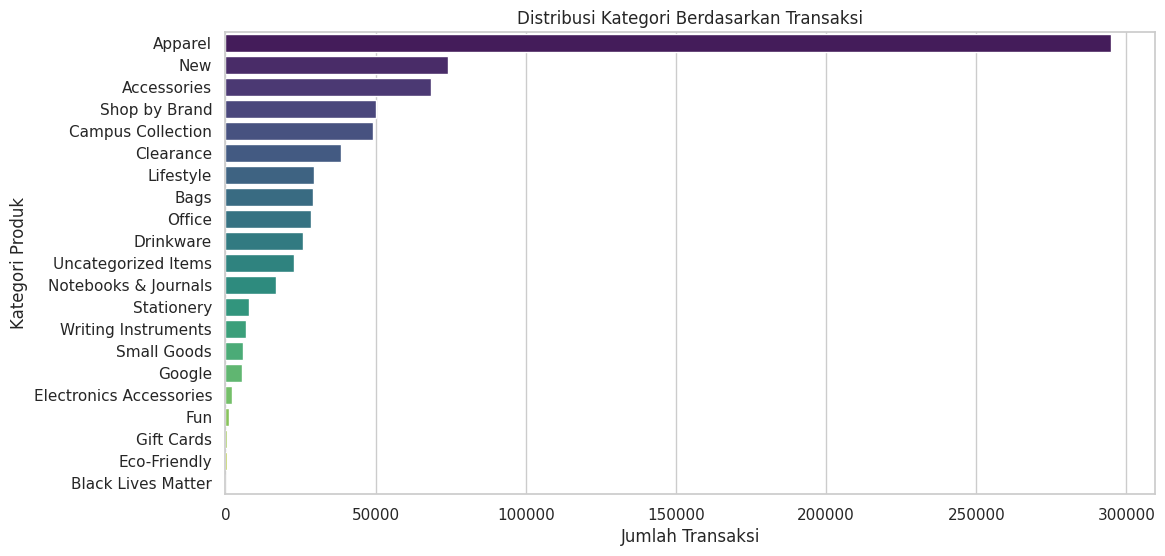

In [7]:
# Plot distribusi kategori produk
plt.figure(figsize=(12, 6))
sns.countplot(data=eda_etransaksi, y='category', order=eda_etransaksi['category'].value_counts().index, palette="viridis")
plt.title('Distribusi Kategori Berdasarkan Transaksi')
plt.xlabel('Jumlah Transaksi')
plt.ylabel('Kategori Produk')
plt.show()


<ipython-input-10-9c758502ea98>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_etransaksi, y='item_id', order=top_10_items.index, palette="viridis")


Text(0, 0.5, 'Item ID')

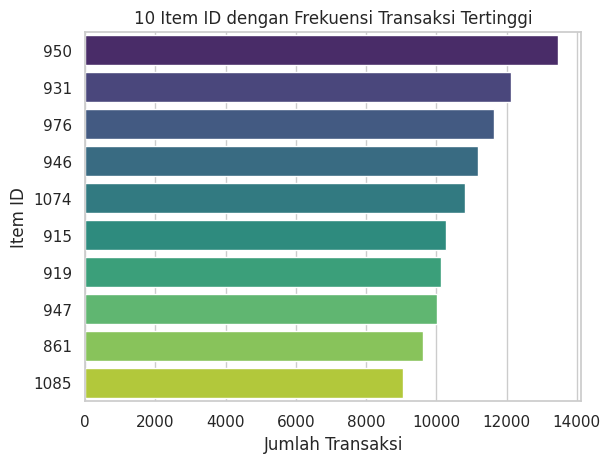

In [10]:
item_counts = eda_etransaksi['item_id'].value_counts()

# Ambil 10 item_id dengan frekuensi tertinggi
top_10_items = item_counts.head(10)

# Buat plot
sns.countplot(data=eda_etransaksi, y='item_id', order=top_10_items.index, palette="viridis")

# Tambahkan judul dan label sumbu (opsional)
plt.title('10 Item ID dengan Frekuensi Transaksi Tertinggi')
plt.xlabel('Jumlah Transaksi')
plt.ylabel('Item ID')


<ipython-input-16-3cd4e00db733>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eda_etransaksi, y='user_id', order=top_10_users.index, palette="viridis")


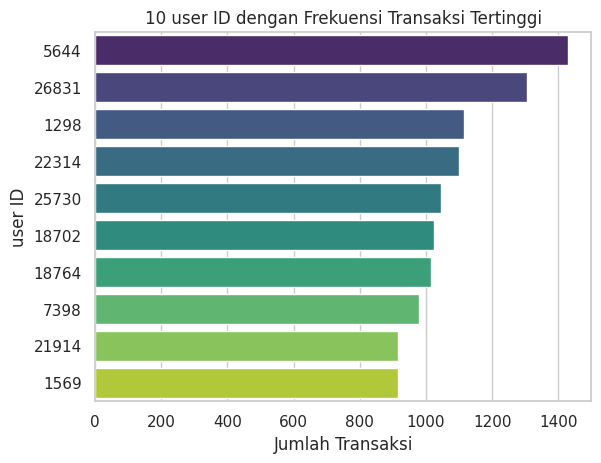

In [16]:
# Hitung frekuensi kemunculan setiap user_id
user_counts = eda_etransaksi['user_id'].value_counts()

# Ambil 10 user_id dengan frekuensi tertinggi
top_10_users = user_counts.head(10)

# Buat plot
sns.countplot(data=eda_etransaksi, y='user_id', order=top_10_users.index, palette="viridis")

# Tambahkan judul dan label sumbu (opsional)
plt.title('10 user ID dengan Frekuensi Transaksi Tertinggi')
plt.xlabel('Jumlah Transaksi')
plt.ylabel('user ID')

# Tampilkan plot
plt.show()

## Data Preprocessing

### Mengubah kolom id pada dataframe barang menjadi item_id

In [7]:

barang = barang.rename(columns={'id': 'item_id'})

### Mengubah kolom id pada dataframe profil menjadi user_id

In [8]:

barang = barang.rename(columns={'id': 'user_id'})

### Menggabungkan Data dengan Fitur Nama barang

In [9]:
all_transaksi_name = pd.merge(transaksi, barang[['item_id','name','brand','variant','category','price_in_usd']], on='item_id', how='left')

# Print dataframe all_transaksi_name
all_transaksi_name

,user_id,ga_session_id,country,device,type,item_id,date,name,brand,variant,category,price_in_usd
0,2133,16909,US,mobile,purchase,94,2020-11-01 00:27:14,Google Large Tote White,Google,Single Option Only,Bags,10
1,2133,16909,US,mobile,purchase,425,2020-11-01 00:27:14,Google Heather Green Speckled Tee,Google,XL,Apparel,21
2,5789,16908,SE,desktop,purchase,1,2020-11-01 01:44:44,Google KeepCup,Google,Single Option Only,New,28
3,5789,16908,SE,desktop,purchase,62,2020-11-01 01:44:44,Google Mini Kick Ball,Google,Single Option Only,Fun,2
4,5808,4267,US,mobile,add_to_cart,842,2020-11-01 03:06:29,Google Infant Hero Onesie Grey,Google,NaN,Apparel,25
...,...,...,...,...,...,...,...,...,...,...,...,...
758879,234237,12443,IN,desktop,add_to_cart,1130,2021-01-31 23:59:08,Google Pocket Tee Grey,Google,NaN,Apparel,29
758880,234237,12443,IN,desktop,add_to_cart,973,2021-01-31 23:59:08,Android Super Hero 3D Framed Art,Android,NaN,Accessories,40
758881,234237,12443,IN,desktop,add_to_cart,915,2021-01-31 23:59:08,Android Large Removable Sticker Sheet,Android,NaN,Accessories,3
758882,234237,12443,IN,desktop,add_to_cart,919,2021-01-31 23:59:08,Android SM S/F18 Sticker Sheet,Android,NaN,Accessories,3


## Data Preparation

### Mengatasi Missing Value

In [10]:
all_transaksi_name.isnull().sum()

,0
user_id,0
ga_session_id,0
country,4555
device,0
type,0
item_id,0
date,0
name,0
brand,0
variant,636260


karena hampir semua kolom variant memiliki nilai null dan kita tidak menggunakan kolom variant kita drop saja, kita hanya menghapus country

In [11]:

all_transaksi_name_clean = all_transaksi_name.dropna(subset=['country'])

drop kolom variant

In [12]:
all_transaksi_name_clean = all_transaksi_name_clean.drop('variant', axis=1)

### Mengatasi Duplicated Value

In [13]:
all_transaksi_name_clean[all_transaksi_name_clean.name.eq('Android Hipster Pin')]

,user_id,ga_session_id,country,device,type,item_id,date,name,brand,category,price_in_usd
2086,23718,3158,PE,desktop,add_to_cart,1155,2020-11-16 12:09:41,Android Hipster Pin,Android,Accessories,6
17577,26812,15491,TW,desktop,purchase,573,2020-11-21 05:16:38,Android Hipster Pin,Android,Accessories,4
17580,26812,15491,TW,desktop,purchase,573,2020-11-21 05:16:38,Android Hipster Pin,Android,Accessories,4
20460,25582,10014,PL,mobile,begin_checkout,573,2020-11-25 12:49:12,Android Hipster Pin,Android,Accessories,4
20480,25582,10014,PL,mobile,purchase,573,2020-11-25 12:52:33,Android Hipster Pin,Android,Accessories,4
...,...,...,...,...,...,...,...,...,...,...,...
756709,16197,7998,TW,mobile,add_to_cart,1155,2021-01-31 06:40:56,Android Hipster Pin,Android,Accessories,6
757262,27027,4306,US,mobile,add_to_cart,1155,2021-01-31 10:31:54,Android Hipster Pin,Android,Accessories,6
757273,27027,4306,US,mobile,add_to_cart,1155,2021-01-31 10:32:01,Android Hipster Pin,Android,Accessories,6
757285,27027,4306,US,mobile,add_to_cart,1155,2021-01-31 10:32:07,Android Hipster Pin,Android,Accessories,6


pada barang yang memiliki nama Android Hipster Pin memiliki item id yang berbeda

In [14]:
all_transaksi_name_clean

,user_id,ga_session_id,country,device,type,item_id,date,name,brand,category,price_in_usd
0,2133,16909,US,mobile,purchase,94,2020-11-01 00:27:14,Google Large Tote White,Google,Bags,10
1,2133,16909,US,mobile,purchase,425,2020-11-01 00:27:14,Google Heather Green Speckled Tee,Google,Apparel,21
2,5789,16908,SE,desktop,purchase,1,2020-11-01 01:44:44,Google KeepCup,Google,New,28
3,5789,16908,SE,desktop,purchase,62,2020-11-01 01:44:44,Google Mini Kick Ball,Google,Fun,2
4,5808,4267,US,mobile,add_to_cart,842,2020-11-01 03:06:29,Google Infant Hero Onesie Grey,Google,Apparel,25
...,...,...,...,...,...,...,...,...,...,...,...
758879,234237,12443,IN,desktop,add_to_cart,1130,2021-01-31 23:59:08,Google Pocket Tee Grey,Google,Apparel,29
758880,234237,12443,IN,desktop,add_to_cart,973,2021-01-31 23:59:08,Android Super Hero 3D Framed Art,Android,Accessories,40
758881,234237,12443,IN,desktop,add_to_cart,915,2021-01-31 23:59:08,Android Large Removable Sticker Sheet,Android,Accessories,3
758882,234237,12443,IN,desktop,add_to_cart,919,2021-01-31 23:59:08,Android SM S/F18 Sticker Sheet,Android,Accessories,3


mengubah item_id menjadi item id terkecil yang memiliki nama yang sama

In [15]:
# Step 1: Temukan item_id terkecil untuk setiap name
all_transaksi_name_clean['item_id_min'] = all_transaksi_name_clean.groupby('name')['item_id'].transform('min')

# Step 2: Ganti semua item_id yang berbeda dengan item_id_min untuk setiap name
all_transaksi_name_clean['item_id'] = all_transaksi_name_clean['item_id_min']

# Step 3: Hapus kolom item_id_min (optional)
all_transaksi_name_clean.drop(columns=['item_id_min'], inplace=True)

# Output hasil
print(all_transaksi_name_clean)

        user_id  ga_session_id country   device         type  item_id  \
0          2133          16909      US   mobile     purchase       94   
1          2133          16909      US   mobile     purchase       99   
2          5789          16908      SE  desktop     purchase        1   
3          5789          16908      SE  desktop     purchase       62   
4          5808           4267      US   mobile  add_to_cart      513   
...         ...            ...     ...      ...          ...      ...   
758879   234237          12443      IN  desktop  add_to_cart     1130   
758880   234237          12443      IN  desktop  add_to_cart       72   
758881   234237          12443      IN  desktop  add_to_cart      287   
758882   234237          12443      IN  desktop  add_to_cart       66   
758883   234237          12443      IN  desktop  add_to_cart      208   

                       date                                   name    brand  \
0       2020-11-01 00:27:14                G

### Menyamakan Jenis nama barang item_id

In [16]:
fix_transaksi = all_transaksi_name_clean.sort_values('item_id', ascending=True)
print(fix_transaksi)

        user_id  ga_session_id country   device         type  item_id  \
122970    11558           7132      TW   mobile  add_to_cart        0   
105320    32291           2596      TW  desktop  add_to_cart        0   
199478    23309          10211      US   mobile  add_to_cart        0   
121528    26685           2602      NL  desktop  add_to_cart        0   
22989     19175           7280      US   mobile  add_to_cart        0   
...         ...            ...     ...      ...          ...      ...   
703273    29992           8218      CN  desktop  add_to_cart     1377   
702154     1952           2993      US   mobile  add_to_cart     1377   
734429     1012           1437      KR  desktop  add_to_cart     1379   
737170    13090           1684      RU  desktop  add_to_cart     1379   
732606    14878           1683      US  desktop  add_to_cart     1379   

                       date                                name   brand  \
122970  2020-12-02 03:59:59        Google Land &

In [17]:
len(fix_transaksi.item_id.unique())

421

In [18]:
fix_transaksi.category.unique()

array(['Apparel', 'New', 'Drinkware', 'Uncategorized Items',
       'Campus Collection', 'Clearance', 'Shop by Brand', 'Small Goods',
       'Black Lives Matter', 'Electronics Accessories', 'Lifestyle',
       'Bags', 'Accessories', 'Office', 'Stationery', 'Fun', 'Google',
       'Writing Instruments', 'Notebooks & Journals', 'Eco-Friendly',
       'Gift Cards'], dtype=object)

In [19]:
preparation = fix_transaksi
preparation.sort_values('item_id')

,user_id,ga_session_id,country,device,type,item_id,date,name,brand,category,price_in_usd
122970,11558,7132,TW,mobile,add_to_cart,0,2020-12-02 03:59:59,Google Land & Sea Cotton Cap,Google,Apparel,17
441512,126,732,ES,desktop,add_to_cart,0,2020-12-18 12:25:41,Google Land & Sea Cotton Cap,Google,Apparel,17
42348,14515,129,US,tablet,add_to_cart,0,2020-11-27 08:47:16,Google Land & Sea Cotton Cap,Google,Apparel,17
520568,20110,2636,CO,desktop,add_to_cart,0,2020-12-25 17:43:52,Google Land & Sea Cotton Cap,Google,Apparel,17
441535,126,732,ES,desktop,add_to_cart,0,2020-12-18 12:27:27,Google Land & Sea Cotton Cap,Google,Apparel,17
...,...,...,...,...,...,...,...,...,...,...,...
703281,29992,8218,CN,desktop,add_to_cart,1377,2021-01-22 12:45:26,White Google Cloud Tumbler,Google,Shop by Brand,27
702154,1952,2993,US,mobile,add_to_cart,1377,2021-01-22 09:19:03,White Google Cloud Tumbler,Google,Shop by Brand,27
737170,13090,1684,RU,desktop,add_to_cart,1379,2021-01-27 11:44:16,Google Mountain View Campus Bottle,Google,Apparel,14
734429,1012,1437,KR,desktop,add_to_cart,1379,2021-01-27 03:28:42,Google Mountain View Campus Bottle,Google,Apparel,14


In [20]:
preparation = preparation.drop_duplicates('item_id')
preparation

,user_id,ga_session_id,country,device,type,item_id,date,name,brand,category,price_in_usd
122970,11558,7132,TW,mobile,add_to_cart,0,2020-12-02 03:59:59,Google Land & Sea Cotton Cap,Google,Apparel,17
644965,264265,14754,US,mobile,add_to_cart,1,2021-01-14 20:04:05,Google KeepCup,Google,New,35
471768,2177,2785,US,mobile,add_to_cart,2,2020-12-21 08:11:28,Google Land & Sea Nalgene Water Bottle,Google,Drinkware,25
710239,9497,4049,US,desktop,purchase,3,2021-01-23 03:55:38,Google Unisex Eco Tee Black,Google,Uncategorized Items,18
505033,9413,105,IN,mobile,add_to_cart,4,2020-12-23 18:36:05,Google Chicago Campus Bottle,Google,Campus Collection,20
...,...,...,...,...,...,...,...,...,...,...,...
696182,1020,841,PK,mobile,add_to_cart,1374,2021-01-21 17:52:19,Google Charcoal Unisex Badge Tee,Google,Shop by Brand,21
702153,1952,2993,US,mobile,add_to_cart,1375,2021-01-22 09:19:03,Google Grey Women's Tee,Google,Shop by Brand,21
700253,4612,3804,PK,mobile,add_to_cart,1376,2021-01-22 04:26:37,Google Tritan Bottle Gray,Google,Shop by Brand,12
700255,4612,3804,PK,mobile,add_to_cart,1377,2021-01-22 04:26:37,White Google Cloud Tumbler,Google,Shop by Brand,27


### melakukan konversi data series menjadi list.

In [21]:
# Mengonversi data series ‘item_id’ menjadi dalam bentuk list
barang_id = preparation['item_id'].tolist()

# Mengonversi data series ‘Name’ menjadi dalam bentuk list
nama_barang = preparation['name'].tolist()

# Mengonversi data series ‘category’ menjadi dalam bentuk list
category_barang = preparation['category'].tolist()
print(len(barang_id))
print(len(nama_barang))
print(len(category_barang))

421
421
421


membuat dictionary untuk menentukan pasangan key-value pada data barang_id, nama_barang, dan category_barang yang telah kita siapkan sebelumnya.

In [22]:
transaksi_new = pd.DataFrame({
    'item_id': barang_id,
    'nama_barang': nama_barang,
    'category': category_barang
})
transaksi_new

,item_id,nama_barang,category
0,0,Google Land & Sea Cotton Cap,Apparel
1,1,Google KeepCup,New
2,2,Google Land & Sea Nalgene Water Bottle,Drinkware
3,3,Google Unisex Eco Tee Black,Uncategorized Items
4,4,Google Chicago Campus Bottle,Campus Collection
...,...,...,...
416,1374,Google Charcoal Unisex Badge Tee,Shop by Brand
417,1375,Google Grey Women's Tee,Shop by Brand
418,1376,Google Tritan Bottle Gray,Shop by Brand
419,1377,White Google Cloud Tumbler,Shop by Brand


## Model Development dengan Content Based Filtering

### TF-IDF Vectorizer

In [ ]:
data = transaksi_new
data.sample(5)

,item_id,nama_barang,category
155,184,Android Iconic Hat Green,New
146,172,Google Toddler Hero Tee Black,Apparel
138,162,Google Cork Passport Holder,Accessories
378,688,Google Women's Pride Eco-Tee Black,Apparel
201,256,Google Light Pen Red,Writing Instruments


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data category
tf.fit(data['category'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['accessories', 'apparel', 'bags', 'black', 'brand', 'by', 'campus',
       'cards', 'clearance', 'collection', 'drinkware', 'eco',
       'electronics', 'friendly', 'fun', 'gift', 'goods', 'google',
       'instruments', 'items', 'journals', 'lifestyle', 'lives', 'matter',
       'new', 'notebooks', 'office', 'shop', 'small', 'stationery',
       'uncategorized', 'writing'], dtype=object)

In [ ]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(data['category'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(421, 32)

In [ ]:
tfidf_matrix.todense()

matrix([[0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan jenis masakan
# Baris diisi dengan nama barang

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=data.nama_barang
).sample(32, axis=1).sample(10, axis=0)

,uncategorized,shop,gift,bags,journals,lives,goods,black,google,apparel,...,electronics,campus,clearance,accessories,brand,by,matter,friendly,stationery,small
nama_barang,,,,,,,,,,,,,,,,,,,,,
Google Pen Grass Green,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000
Google Emoji Magnet Set,0.0,0.0,0.0,0.0,0.0,0.0,0.707107,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.707107
Google ApPeel Journal Red,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Google Confetti Slim Task Pad,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Google Women's Ringer Tee,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Google Glass Bottle,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Google Large Pet Leash (Blue/Green),0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000
Google Blue Kids Sunglasses,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000
Google Seattle Campus Sticker,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.707107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


###Cosine Similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [ ]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama barang
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['nama_barang'], columns=data['nama_barang'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap item
cosine_sim_df.sample(10, axis=1).sample(50, axis=0)

Shape: (421, 421)


nama_barang,Google Seattle Campus Unisex Tee,Android Iconic Hat Green,Google Confetti Tote White,Google LA Campus Zip Hoodie,Google Austin Campus Ladies Tee,Google Sunnyvale Campus Ladies Tee,YouTube Crew Socks,Google Incognito Flap Pack,Google NYC Campus Lapel Pin,Android Iconic Backpack
nama_barang,,,,,,,,,,
Google 24oz Ring Bottle Blue,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Google Sunnyvale Campus Mug,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
Google Woodtop Bottle Black,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Super G Unisex Joggers,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Google Light Pen Blue,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Google Maps Pin,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Unisex Google Pocket Tee Grey,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Google Infant Hero Onesie Grey,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
YouTube Icon Tee Grey,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Mendapatkan Rekomendasi

In [ ]:
def barang_recommendations(input_nama_barang, similarity_data=cosine_sim_df, items=data[['nama_barang', 'category']], k=20):
    """
    Rekomendasi barang berdasarkan kemiripan dataframe

    Parameter:
    ---
    input_nama_barang : tipe data string (str)
                Nama barang (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan barang sebagai
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---


    Pada index ini, kita mengambil k dengan nilai similarity terbesar
    pada index matrix yang diberikan (i).
    """


    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,input_nama_barang].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop input_nama_barang agar nama barang yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(input_nama_barang, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [ ]:
data[data.nama_barang.eq('Google Flat Front Bag Grey')]

,item_id,nama_barang,category
239,316,Google Flat Front Bag Grey,Bags


In [ ]:
barang_recommendations('Google Flat Front Bag Grey')

,nama_barang,category
0,Google Incognito Messenger Bag,Bags
1,Google Large Tote White,Bags
2,Google Packable Bag Black,Bags
3,Google Striped Penny Pouch,Bags
4,Google Incognito Laptop Organizer,Bags
5,Google Confetti Tote White,Bags
6,Supernatural Paper Backpack,Bags
7,Google Incognito Zip Pack,Bags
8,Google Campus Bike Tote Navy,Bags
9,Google Mesh Bag Red,Bags


## Model Development dengan Collaborative Filtering

### Data Preparation

In [ ]:
all_transaksi_name_clean

,user_id,ga_session_id,country,device,type,item_id,date,name,brand,category,price_in_usd
0,2133,16909,US,mobile,purchase,94,2020-11-01 00:27:14,Google Large Tote White,Google,Bags,10
1,2133,16909,US,mobile,purchase,99,2020-11-01 00:27:14,Google Heather Green Speckled Tee,Google,Apparel,21
2,5789,16908,SE,desktop,purchase,1,2020-11-01 01:44:44,Google KeepCup,Google,New,28
3,5789,16908,SE,desktop,purchase,62,2020-11-01 01:44:44,Google Mini Kick Ball,Google,Fun,2
4,5808,4267,US,mobile,add_to_cart,513,2020-11-01 03:06:29,Google Infant Hero Onesie Grey,Google,Apparel,25
...,...,...,...,...,...,...,...,...,...,...,...
758879,234237,12443,IN,desktop,add_to_cart,1130,2021-01-31 23:59:08,Google Pocket Tee Grey,Google,Apparel,29
758880,234237,12443,IN,desktop,add_to_cart,72,2021-01-31 23:59:08,Android Super Hero 3D Framed Art,Android,Accessories,40
758881,234237,12443,IN,desktop,add_to_cart,287,2021-01-31 23:59:08,Android Large Removable Sticker Sheet,Android,Accessories,3
758882,234237,12443,IN,desktop,add_to_cart,66,2021-01-31 23:59:08,Android SM S/F18 Sticker Sheet,Android,Accessories,3


karena pada dataset kita tidak memilki rating, kita akan menggunakan type sebagai gantinya jika user
- add_to_cart = 1
- begin_checkout = 2
- purchase = 3

In [23]:
# Create a mapping for event types
event_type_mapping = {
    'add_to_cart': 1,
    'begin_checkout': 2,
    'purchase': 3
}

# Convert the 'event' column to numerical values based on the mapping
all_transaksi_name_clean['event_type'] = all_transaksi_name_clean['type'].map(event_type_mapping)

# Print some info to check the changes
print(all_transaksi_name_clean['event_type'].value_counts())
all_transaksi_name_clean.head()

event_type
1    663305
2     75549
3     15475
Name: count, dtype: int64


,user_id,ga_session_id,country,device,type,item_id,date,name,brand,category,price_in_usd,event_type
0,2133,16909,US,mobile,purchase,94,2020-11-01 00:27:14,Google Large Tote White,Google,Bags,10,3
1,2133,16909,US,mobile,purchase,99,2020-11-01 00:27:14,Google Heather Green Speckled Tee,Google,Apparel,21,3
2,5789,16908,SE,desktop,purchase,1,2020-11-01 01:44:44,Google KeepCup,Google,New,28,3
3,5789,16908,SE,desktop,purchase,62,2020-11-01 01:44:44,Google Mini Kick Ball,Google,Fun,2,3
4,5808,4267,US,mobile,add_to_cart,513,2020-11-01 03:06:29,Google Infant Hero Onesie Grey,Google,Apparel,25,1


In [25]:
df = all_transaksi_name_clean[['user_id', 'item_id', 'event_type']]

In [26]:
# Mengubah user_id menjadi list tanpa nilai yang sama
user_ids = df['user_id'].unique().tolist()
print('list user_id: ', user_ids)

# Melakukan encoding user_id
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded user_id : ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke user_id
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke user_id: ', user_encoded_to_user)

list user_id:  [2133, 5789, 5808, 20120, 16563, 20129, 2131, 23766, 7407, 2130, 9149, 20146, 31027, 20141, 22211, 28378, 18192, 6786, 1244, 20451, 21127, 1580, 32043, 16561, 24772, 13983, 15257, 13243, 5115, 6787, 31373, 29623, 24063, 8123, 6761, 19232, 685, 28154, 1885, 32033, 18852, 6158, 31794, 3153, 11348, 28353, 9747, 2328, 21145, 21142, 17542, 15530, 9749, 1694, 16901, 12039, 20469, 12981, 30610, 1052, 27723, 20439, 31395, 31368, 20450, 1414, 21814, 7495, 2476, 16899, 23767, 27752, 9745, 10904, 2488, 2482, 15266, 13324, 27738, 13342, 15500, 18998, 16576, 24061, 13335, 23020, 31371, 21710, 13309, 29991, 31380, 27713, 15819, 8150, 16883, 16902, 598, 6138, 27715, 6161, 25157, 11085, 30101, 18020, 16583, 25243, 2136, 17185, 10886, 11946, 18003, 14653, 7268, 7256, 18586, 29939, 2495, 18007, 18958, 2893, 32434, 18012, 13426, 17320, 13763, 20445, 4332, 24505, 17277, 10183, 1064, 20885, 176, 22402, 30476, 18869, 1892, 11966, 1459, 9136, 23493, 13726, 17311, 29457, 30148, 9294, 2883, 6528

In [27]:
# Mengubah item_id menjadi list tanpa nilai yang sama
item_ids = df['item_id'].unique().tolist()

# Melakukan proses encoding item_id
item_to_item_encoded = {x: i for i, x in enumerate(item_ids)}
print('encoded item_id : ', item_to_item_encoded)
# Melakukan proses encoding angka ke item_id
item_encoded_to_item = {i: x for i, x in enumerate(item_ids)}
print('encoded angka ke item_id: ', item_encoded_to_item)

encoded item_id :  {94: 0, 99: 1, 1: 2, 62: 3, 513: 4, 275: 5, 131: 6, 1068: 7, 89: 8, 25: 9, 252: 10, 830: 11, 8: 12, 0: 13, 341: 14, 184: 15, 423: 16, 133: 17, 73: 18, 173: 19, 429: 20, 362: 21, 194: 22, 403: 23, 72: 24, 432: 25, 283: 26, 66: 27, 433: 28, 378: 29, 113: 30, 12: 31, 147: 32, 6: 33, 90: 34, 78: 35, 189: 36, 430: 37, 295: 38, 431: 39, 81: 40, 111: 41, 476: 42, 511: 43, 57: 44, 209: 45, 384: 46, 30: 47, 92: 48, 76: 49, 121: 50, 167: 51, 19: 52, 29: 53, 48: 54, 164: 55, 183: 56, 40: 57, 49: 58, 411: 59, 174: 60, 420: 61, 249: 62, 69: 63, 485: 64, 55: 65, 63: 66, 135: 67, 398: 68, 438: 69, 108: 70, 86: 71, 290: 72, 229: 73, 300: 74, 185: 75, 7: 76, 43: 77, 419: 78, 404: 79, 405: 80, 400: 81, 190: 82, 415: 83, 75: 84, 254: 85, 97: 86, 281: 87, 240: 88, 230: 89, 165: 90, 2: 91, 188: 92, 87: 93, 3: 94, 205: 95, 456: 96, 124: 97, 71: 98, 244: 99, 495: 100, 148: 101, 331: 102, 24: 103, 259: 104, 528: 105, 83: 106, 158: 107, 246: 108, 45: 109, 202: 110, 307: 111, 312: 112, 544: 1

In [29]:
# Mapping user_id ke dataframe user
df['user'] = df['user_id'].map(user_to_user_encoded)

# Mapping item_id ke dataframe item
df['item'] = df['item_id'].map(item_to_item_encoded)

<ipython-input-29-f1f558fac898>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['user'] = df['user_id'].map(user_to_user_encoded)
<ipython-input-29-f1f558fac898>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['item'] = df['item_id'].map(item_to_item_encoded)


In [30]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Mendapatkan jumlah item
num_item = len(item_encoded_to_item)
print(num_item)

# Mengubah event_type menjadi nilai float
df['event_type'] = df['event_type'].values.astype(np.int32)

# Nilai minimum event_type
min_event_type = min(df['event_type'])

# Nilai maksimal event_type
max_event_type = max(df['event_type'])

print('Number of User: {}, Number of item: {}, Min event_type: {}, Max event_type: {}'.format(
    num_users, num_item, min_event_type, max_event_type
))

14594
421
Number of User: 14594, Number of item: 421, Min event_type: 1, Max event_type: 3


<ipython-input-30-5e700d22c87b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event_type'] = df['event_type'].values.astype(np.int32)


#### Membagi Data untuk Training dan Validasi

In [31]:
df = df.sample(frac=1, random_state=42)
df

,user_id,item_id,event_type,user,item
280647,29633,60,1,6849,246
445566,21527,31,1,9200,212
122593,16962,54,1,3828,224
695974,245878,380,1,13281,320
737676,29873,1130,1,14070,350
...,...,...,...,...,...
260646,25764,398,1,6492,68
367840,30421,138,1,8188,301
132513,22240,0,2,3859,13
675253,25620,190,1,12924,82


In [32]:
# Membuat variabel x untuk mencocokkan data user dan item menjadi satu value
x = df[['user', 'item']].values

# Membuat variabel y untuk membuat event_type dari hasil
y = df['event_type'].apply(lambda x: (x - min_event_type) / (max_event_type - min_event_type)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
print(x, y)

[[ 6849   246]
 [ 9200   212]
 [ 3828   224]
 ...
 [ 3859    13]
 [12924    82]
 [ 3828    46]] [0.  0.  0.  ... 0.5 0.  0. ]


### Proses Training


In [ ]:
import tensorflow as tf # Import tensorflow
from tensorflow import keras
from tensorflow.keras import layers

class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_item, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_item = num_item
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.item_embedding = layers.Embedding( # layer embeddings item
        num_item,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.item_bias = layers.Embedding(num_item, 1) # layer embedding item bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    item_vector = self.item_embedding(inputs[:, 1]) # memanggil layer embedding 3
    item_bias = self.item_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_item = tf.tensordot(user_vector, item_vector, 2)

    x = dot_user_item + user_bias + item_bias

    return tf.nn.sigmoid(x) # activation sigmoid

In [ ]:
model = RecommenderNet(num_users, num_item, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [ ]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 64,
    epochs = 50,
    validation_data = (x_val, y_val)
)

Epoch 1/50
9430/9430 ━━━━━━━━━━━━━━━━━━━━ 47s 5ms/step - loss: 0.2963 - root_mean_squared_error: 0.2388 - val_loss: 0.2108 - val_root_mean_squared_error: 0.1815
Epoch 2/50
9430/9430 ━━━━━━━━━━━━━━━━━━━━ 46s 5ms/step - loss: 0.2076 - root_mean_squared_error: 0.1793 - val_loss: 0.1993 - val_root_mean_squared_error: 0.1744
Epoch 3/50
9430/9430 ━━━━━━━━━━━━━━━━━━━━ 45s 5ms/step - loss: 0.1971 - root_mean_squared_error: 0.1733 - val_loss: 0.1938 - val_root_mean_squared_error: 0.1711
Epoch 4/50
9430/9430 ━━━━━━━━━━━━━━━━━━━━ 45s 5ms/step - loss: 0.1914 - root_mean_squared_error: 0.1696 - val_loss: 0.1898 - val_root_mean_squared_error: 0.1691
Epoch 5/50
9430/9430 ━━━━━━━━━━━━━━━━━━━━ 47s 5ms/step - loss: 0.1878 - root_mean_squared_error: 0.1678 - val_loss: 0.1870 - val_root_mean_squared_error: 0.1674
Epoch 6/50
9430/9430 ━━━━━━━━━━━━━━━━━━━━ 48s 5ms/step - loss: 0.1850 - root_mean_squared_error: 0.1660 - val_loss: 0.1849 - val_root_mean_squared_error: 0.1662
Epoch 7/50
9430/9430 ━━━━━━━━━━━━━

### Visualisasi Metrik

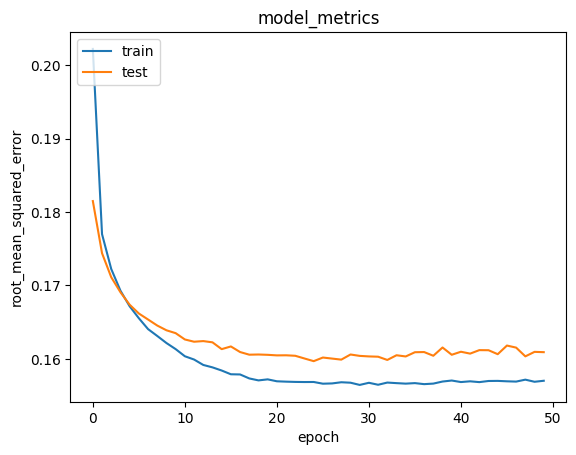

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Mendapatkan Rekomendasi Item

In [ ]:
item_df = all_transaksi_name_clean[['item_id','name','category']]
df = all_transaksi_name_clean[['user_id', 'item_id', 'event_type']]

# Mengambil sample user
user_id = df.user_id.sample(1).iloc[0]
item_visited_by_user = df[df.user_id == user_id]

# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html
item_not_visited = item_df[~item_df['item_id'].isin(item_visited_by_user.item_id.values)]['item_id']
item_not_visited = list(
    set(item_not_visited)
    .intersection(set(item_to_item_encoded.keys()))
)

item_not_visited = [[item_to_item_encoded.get(x)] for x in item_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_item_array = np.hstack(
    ([[user_encoder]] * len(item_not_visited), item_not_visited)
)

In [ ]:
# Predict ratings
ratings = model.predict(user_item_array).flatten()

# Get top 10 indices of highest ratings
top_ratings_indices = ratings.argsort()[-10:][::-1]

# Ensure recommended item IDs are unique
recommended_item_ids = list(set([
    item_encoded_to_item.get(item_not_visited[x][0]) for x in top_ratings_indices
]))

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)

# Limit to only showing top 10 items with the highest event_type from the user
print('10 item with high event_type from user ')
print('----' * 8)

# Sort by event_type and limit to top 10, remove duplicates
top_item_user = (
    item_visited_by_user.sort_values(by='event_type', ascending=False)
    .head(10)  # Limiting to top 10 items
    .drop_duplicates(subset=['item_id'])  # Remove duplicates
    .item_id.values
)

item_df_rows = item_df[item_df['item_id'].isin(top_item_user)].drop_duplicates(subset=['item_id'])
for row in item_df_rows.itertuples():
    print(row.name, ':', row.category)

# Display top 10 item recommendation
print('Top 10 item recommendation')
print('----' * 8)

# Filter recommended items and remove duplicates
recommended_item = item_df[item_df['item_id'].isin(recommended_item_ids)].drop_duplicates(subset=['item_id'])

# Print item names and categories
for row in recommended_item.itertuples():
    print(row.name, ':', row.category)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Showing recommendations for users: 3564
15 item with high event_type from user 
--------------------------------
Google KeepCup : New
Google Perk Thermal Tumbler : Lifestyle
Google Thermal Tumbler Navy : Drinkware
YouTube Play Mug : Lifestyle
Google Campus Bike Corkbase Mug Blue : Lifestyle
Google Camp Mug Ivory : Drinkware
Android Iconic Mug Gray : New
Stainless Straight Straw/Cleaner : New
Google Mural Mug : Drinkware
Top 10 item recommendation
--------------------------------
Google SF Campus Mug : Campus Collection
Daddy Works at Google Book : Small Goods
Google Unisex Eco Tee Black : Uncategorized Items
Unisex Google Pocket Tee Grey : Apparel
Google Incognito Techpack V2 : Bags
Google Campus Bike : Accessories
Google Summer19 Crew Grey : Apparel
Google F/C Longsleeve Ash : Apparel
Google Tudes Thermal Bottle : Drinkware
Unisex Google Jumbo Print Tee White : Apparel
